# Tarea 2 - Estadística Computacional

- Nombre: Pamela Illescas Maldonado
- Nombre: Víctor Trigo Rojas

Curso: Estadística Computacional

Doctorado en Ciencias mención Biofísica y Biología Computacional / Magíster en Estadística


Responda las preguntas que se indican colocando el código requerido. El Notebook se entrega totalmente ejecutado.

**Ingrese los Toolbox que se utilizarán en este Jupyter**

In [27]:
import time
import numpy as np

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

## 1. Estudio de Algoritmos de Ordenamiento

Realizar un estudio comparativo de los tiempos de ejecución requeridos por los algoritmos de ordenamientos, para ordernar listas de elementos con diferentes tamaños. El estudio debe considerar al menos 4 algoritmos de ordenamientos diferentes seleccionados por Ud.

**1.1.-** Implementar una función que genere una lista con $n$ números aleatorios en el rango $a$, $b$. Los parámetros $n, a, b$ son ingresados por el usuario.

In [3]:
def random():
    n = int(input('Ingrese el número de datos que desea ordenar: '))
    a = int(input('Ingrese rango de los datos, limite inferior: '))
    b = int(input('Ingrese rango de los datos, limite superior: '))
    return np.random.randint(a,b+1, size=n)

In [4]:
arreglo = random()
print(arreglo)

Ingrese el número de datos que desea ordenar: 20
Ingrese rango de los datos, limite inferior: 1
Ingrese rango de los datos, limite superior: 10
[ 3  1  4  1  6  7  1  9  8  8  3  3  9  5  4 10  4  4  2  3]


**1.2.-** Implementar al menos 4 funciones con algoritmos de ordenamientos diferentes

In [5]:
# Selection Sort
def selectionSort(arr): 
    
    for i in range(len(arr)): #Recorrer todos los elementos del arreglo
        min_idx = i
        for j in range(i+1, len(arr)): #Encontrar el elemento más pequeño
            if arr[min_idx] > arr[j]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]   
    print("Arreglo de tamaño ",len(arr) , " ordenado es:") #Intercambiar elementos
    for i in range(len(arr)):
        print("%d" %arr[i],end=" ")
arr1= arreglo.copy()    
selectionSort(arr1)

Arreglo de tamaño  20  ordenado es:
1 1 1 2 3 3 3 3 4 4 4 4 5 6 7 8 8 9 9 10 

In [6]:
# Bubble Sort
def bubbleSort(arr):
    n = len(arr)
    #Recorrer todos los elementos del arreglo
    for i in range(n-1):
        #Los últimos elementos están ordenados
        for j in range(0, n-i-1):
            #Recorrer el arreglo desde 0 a n-i-1
            #Intercambiar los elementos si el elemento es mayor que el siguiente
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    print("Arreglo ordenado es:")
    for i in range(len(arr)):
        print("%d" %arr[i], end=" ")
arr2= arreglo.copy()
bubbleSort(arr2)

Arreglo ordenado es:
1 1 1 2 3 3 3 3 4 4 4 4 5 6 7 8 8 9 9 10 

In [7]:
# Merge Sort
def merge(arr, l, m, r):

    n1 = m - l + 1
    n2 = r - m
    
    #Crear arreglos temporales
    L = [0] * (n1)
    R = [0] * (n2)
    
    #Copiar los datos en los arreglos temporales L y R
    for i in range(0, n1):
        L[i] = arr[l+i]
        
    for j in range(0, n2):
        R[j] = arr[m + 1 + j]
        
    #Copiar los arreglos temporales en arr[l..r]
    i = 0 #index primer sub-arreglo
    j = 0 #index segundo sub-arreglo
    k = l #index arreglo mezclado

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
        
    #Copiar el resto del subarreglo L
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
    
    #Copiar el resto del subarreglo R
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

def mergeSort(arr, l, r):
    if l < r:
        m = l+(r-l)//2
        
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)
      


arr3=arreglo.copy()
n=len(arr3)

print("Arreglo es:")
for i in range(n):
        print("%d" % arr3[i],end=" ")

mergeSort(arr3, 0, n-1)
print("\n\nEl arreglo ordenado es: ")
for i in range(n):
    print("%d" %arr3[i],end=" ")

Arreglo es:
3 1 4 1 6 7 1 9 8 8 3 3 9 5 4 10 4 4 2 3 

El arreglo ordenado es: 
1 1 1 2 3 3 3 3 4 4 4 4 5 6 7 8 8 9 9 10 

In [8]:
# QuickSort
def partition(arr, low ,high):
    i = (low - 1) #índice del elemento más pequeño
    pivot = arr[high] #pivote
    for j in range(low, high):
        
        if arr[j] <= pivot:
            #incrementar el ínidice del elemento más pequeño
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
    
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return(i+1)

def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
        pi = partition(arr, low, high) #índice de partición
        
        quickSort(arr, low , pi-1)
        quickSort(arr, pi+1, high)
        

arr4=arreglo.copy()
n=len(arr4)

print("Arreglo es:")
for i in range(n):
        print("%d" % arr4[i],end=" ")

quickSort(arr4, 0, n-1)

print("\n\nEl arreglo ordenado es: ")
for i in range(n):
    print("%d" % arr4[i],end=" ")

Arreglo es:
3 1 4 1 6 7 1 9 8 8 3 3 9 5 4 10 4 4 2 3 

El arreglo ordenado es: 
1 1 1 2 3 3 3 3 4 4 4 4 5 6 7 8 8 9 9 10 

**1.3.-** Calcular los tiempos de ejecución requeridos por los métodos para ordenar listas aleatorias de elementos con $n= 10, 100, 1000, 10000, 100000$ elementos.  

In [24]:
a = 1
b = 100

arreglo10     = np.random.randint(a,b+1, size=10)
arreglo100    = np.random.randint(a,b+1, size=100)
arreglo1000   = np.random.randint(a,b+1, size=1000)
arreglo10000  = np.random.randint(a,b+1, size=10000)
arreglo100000 = np.random.randint(a,b+1, size=100000)

In [25]:
arreglos = [arreglo10,arreglo100,arreglo1000,arreglo10000,arreglo100000]

In [29]:
arreglos1 = arreglos.copy()
selectionTime = []
i = 0
for arr in arreglos1:
    inicio = time.time()
    selectionSort(arr)
    fin = time.time()
    selectionTime.append(fin-inicio)
    print('\n','-'*60)
print(selectionTime)

Arreglo de tamaño  10  ordenado es:
4 6 8 25 37 45 48 57 61 75 
 ------------------------------------------------------------
Arreglo de tamaño  100  ordenado es:
1 1 2 4 4 5 6 7 7 7 8 13 13 14 16 16 17 22 22 22 22 23 23 27 28 30 31 31 32 32 33 33 33 33 34 35 35 37 38 38 39 39 40 41 43 44 44 44 45 45 46 46 47 49 52 52 55 55 56 59 61 62 62 63 65 67 70 72 74 75 76 77 78 78 79 79 79 79 79 80 82 83 83 84 85 85 85 85 88 90 91 92 96 96 97 97 98 98 98 99 
 ------------------------------------------------------------
Arreglo de tamaño  1000  ordenado es:
1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 1

Arreglo de tamaño  100000  ordenado es:


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 1

 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 

31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 3

 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 

43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 4

 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 

 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 

 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 

 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 

 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 

80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 8

 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 

92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 9

 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 

In [12]:
arreglos1 = arreglos.copy()
bubbleTime = []
i = 0
for arr in arreglos1:
    inicio = time.time()
    bubbleSort(arr)
    fin = time.time()
    bubbleTime.append(fin-inicio)
    print('\n','-'*60)
print(bubbleTime)

Arreglo ordenado es:
2 20 32 33 43 43 47 63 64 76 
 ------------------------------------------------------------
Arreglo ordenado es:
1 1 2 2 5 6 7 7 9 10 10 15 20 23 26 27 29 30 32 32 32 32 35 36 36 37 39 39 40 41 41 42 42 44 46 48 48 48 49 49 51 51 52 53 53 54 55 56 56 56 57 58 59 61 62 65 67 68 68 68 71 72 74 75 75 76 77 78 78 79 81 83 83 83 84 85 85 87 88 88 88 90 90 90 90 91 91 92 92 93 94 94 95 95 96 96 97 97 98 99 
 ------------------------------------------------------------
Arreglo ordenado es:
1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19 19 19 19 19 20 20 20

Arreglo ordenado es:


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 

26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 2

 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 

41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 4

 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 

54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 5

 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 

67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 6

 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 

80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 8

 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 

94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 94 9

In [31]:
arreglos1 = arreglos.copy()
mergeTime = []
i = 0
for arr in arreglos1:
    inicio = time.time()
    mergeSort(arr, 12,3)
    print("\n\nEl arreglo ordenado es: ")
    for i in range(len(arr)):
        print("%d" %arr[i],end=" ")
    fin = time.time()
    mergeTime.append(fin-inicio)
    print('\n','-'*60)
print(mergeTime)



El arreglo ordenado es: 
4 6 8 25 37 45 48 57 61 75 
 ------------------------------------------------------------


El arreglo ordenado es: 
1 1 2 4 4 5 6 7 7 7 8 13 13 14 16 16 17 22 22 22 22 23 23 27 28 30 31 31 32 32 33 33 33 33 34 35 35 37 38 38 39 39 40 41 43 44 44 44 45 45 46 46 47 49 52 52 55 55 56 59 61 62 62 63 65 67 70 72 74 75 76 77 78 78 79 79 79 79 79 80 82 83 83 84 85 85 85 85 88 90 91 92 96 96 97 97 98 98 98 99 
 ------------------------------------------------------------


El arreglo ordenado es: 
1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 19 1

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 1

15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 1

 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 

 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 

 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 

40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 4

 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 

52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 5

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 

65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 6

 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 

78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 7

84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 8

91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 9

 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 

In [32]:
arreglos1 = arreglos.copy()
quickTime = []
i = 0
for arr in arreglos1:
    inicio = time.time()
    quickSort(arr, 12,3)
    print("\n\nEl arreglo ordenado es: ")
    for i in range(len(arr)):
        print("%d" % arr[i],end=" ")
    fin = time.time()
    quickTime.append(fin-inicio)
    print('\n','-'*60)
print(quickTime)



El arreglo ordenado es: 
4 6 8 25 37 45 48 57 61 75 
 ------------------------------------------------------------


El arreglo ordenado es: 
1 1 2 4 4 5 6 7 7 7 8 13 13 14 16 16 17 22 22 22 22 23 23 27 28 30 31 31 32 32 33 33 33 33 34 35 35 37 38 38 39 39 40 41 43 44 44 44 45 45 46 46 47 49 52 52 55 55 56 59 61 62 62 63 65 67 70 72 74 75 76 77 78 78 79 79 79 79 79 80 82 83 83 84 85 85 85 85 88 90 91 92 96 96 97 97 98 98 98 99 
 ------------------------------------------------------------


El arreglo ordenado es: 
1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 19 1

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 

 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 

21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 2

 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 

31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 3

 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 

44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 4

50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 5

56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 5

 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 

67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 6

 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 

79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 7

86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 8

90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 9

 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 97 

**1.4.-** Colcar una tabla comparativa con los resultados, además de un gráfico de $n$ vs $tiempo$.

In [33]:
df = pd.DataFrame()

df['n=10'] = None
df['n=100'] = None
df['n=1000'] = None
df['n=10000'] = None
df['n=100000'] = None

df.loc['selectionSort'] = selectionTime
df.loc['bubbleSort'] = bubbleTime
df.loc['mergeSort'] = mergeTime
df.loc['quickSort'] = quickTime

print(df)

                   n=10     n=100    n=1000   n=10000    n=100000
selectionSort  0.000250  0.003296  0.090094  5.348871  594.585169
bubbleSort     0.000328  0.002260  0.088431  6.098382  591.476287
mergeSort      0.000727  0.005782  0.033852  0.310135    3.277583
quickSort      0.000520  0.003509  0.033654  0.370264    3.443343


##### Gráfico 1

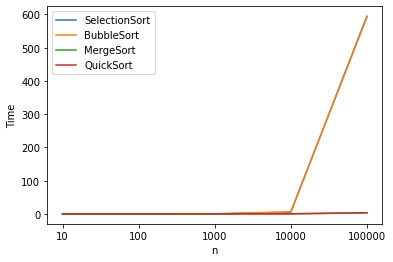

In [34]:
n = ['10','100','1000','10000','100000']
sorted = ['SelectionSort','BubbleSort','MergeSort','QuickSort']
plt.plot(n, selectionTime)
plt.plot(n, bubbleTime)
plt.plot(n, mergeTime)
plt.plot(n, quickTime)
plt.xlabel('n')
plt.ylabel('Time')
plt.legend(sorted)

##### Gráfico 2

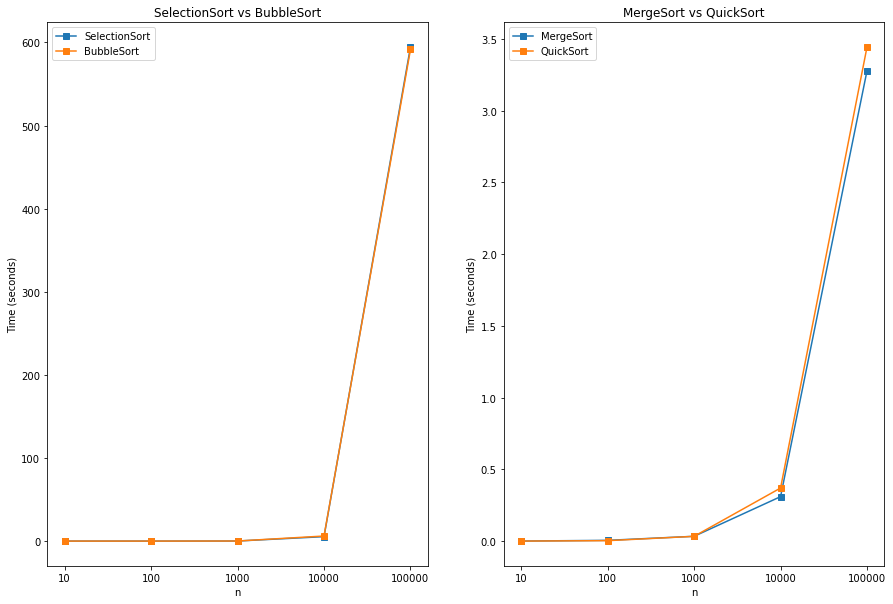

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.plot(n, selectionTime, '-s')
ax1.plot(n, bubbleTime, '-s')
ax1.set_title('SelectionSort vs BubbleSort')
ax1.set_xlabel('n')
ax1.set_ylabel('Time (seconds)')
ax1.legend(['SelectionSort','BubbleSort'])

ax2.plot(n, mergeTime, '-s')
ax2.plot(n, quickTime, '-s')
ax2.set_title('MergeSort vs QuickSort')
ax2.set_xlabel('n')
ax2.set_ylabel('Time (seconds)')
ax2.legend(['MergeSort','QuickSort'])

**Concluir:** 

En el gráfico 1 podemos ver la diferencia en la velocidad de convergencia en los algoritmos de SelectionSort y BubbleSort contra los algoritmos MergeSort y QuickSort, esto debido a su velocidad de convergencia. Tanto SelectionSort como BubbleSort tienen una complejidad temporal cuadrática, mientras que MergeSort y QuickSort tienen una complejidad temporal Logarítmica. Al comparar algoritmos con igual velocidad de convergencia (ver gráfico 2) podemos ver mejor sus similitudes.


## 2. Métodos Numéricos

**2.1.** Implementar el método de Halley cuya ecuación de iteración está dada por:

$$g(x) = x - \frac{f(x)}{f'(x)}\left(1 - \frac{f(x)\cdot f''(x)}{2(f'(x))^2} \right)^{-1}$$

Una vez implementada la función, aplicarla para resolver la ecuación:

$$f(x) = x^3 -3x + 2$$

con punto de partida $x_0=2.4$.

In [18]:
def Halley(f,df,df2,x0,tol=10**(-8)):
    fm=f(x0)
    x=x0
    k=0
    while np.abs(fm)>tol:
        fun=f(x)
        fprime= df(x)
        fprime2= df2(x)
        x= x - (fun/fprime) *( 1 - ( (fun*fprime2) / (2*fprime**2) ) )**-1 
        k+=1
        fm=f(x)
        if k>1000:
            print("no converge")
            break
    print("cantidad de iteraciones:",k)
    return x
        

In [19]:
def f(x):
    return x**3 - 3*x + 2

def df(x):
    return 3*x**2 - 3

def df2(x):
    return 6*x

solucion = Halley(f,df,df2,2.4)
print(f"Una solución es: {solucion:.2g}" )

cantidad de iteraciones: 10
Una solución es: 1


**2.2** El proceso de aceleración de Aitken se utiliza para acelerar el proceso de convergencia de los algoritmos con convergencia lineal.

Dada una secuencia $\{x_n\}_{n=0}^{\infty}$ que converge linealmente a $p$, entonces el proceso de Aitken está dada por:

$$q_n = x_n - \frac{(x_{n+1}-x_n)^2}{x_{n+2} - 2x_{n+1} + x_n}$$.

**Problema:** La secuencencia $\{x_n\}$ generada por la iteración de punto fijo $g(x) = \ln(x) + 2$ y partiendo desde $x_0=3.14$ converge linealmente a $p\approx 3.1419322$. Apicar el método de Aitken para encontrar $q_1$, $q_2$ y $q_3$ y de esta forma acelerar la convergencia.

In [20]:
def g(x):
    return np.log(x)+2
x0= 3.14

def qn(n,x0):
    x=x0
    for i in range(n):   
        x=g(x)
  
    xn=x
    xn1=g(xn)
    xn2=g(xn1)
    
    return xn -(xn1-xn)**2/(xn2-2*xn1+xn) 

print(f"q1 es: {qn(1,x0)}")     
print(f"q2 es: {qn(2,x0)}")     
print(f"q3 es: {qn(3,x0)}")     


q1 es: 3.1461933120965377
q2 es: 3.146193229861081
q3 es: 3.1461932215540767


#3.- Problema de Aplicación:

Un problema clásico de la física elemental es el lanzamiento de un proyectil. Suponiendo que se dispara un proyectil desde el origen con un ángulo $\alpha$ y velocidad inicial $v_0$. La ecuación de movimiento horizontal y vertical de la trayectoria del proyectil, al considerar una resistencia del aire proporcional a la velocidad, viene determinado por el siguiente modelo:

$$
  \begin{array}{cl}
 y(t) &= (Cv_y+9.8C^2)\left(1-e^{-t/C}\right)-9.8Ct\\
 x(t) &= Cv_x\left(1-e^{-t/C}\right)
 \end{array}
$$

donde $C=m/\kappa$, $\kappa$ es el coeficiente de resitencia del aire y $m$ es la masa del proyectil. Además $v_x=v_0 \cos(\alpha)$ y $v_y=v_0 \sin(\alpha)$.

Se dispara el proyectil con un ángulo de elevación de $60°$, velocidades iniciales $v_0=100 [m/s]$ y $C=10$. Determinar el tiempo transcurrido hasta el impacto en el suelo y el alcance del lanzamiento. 

- 3.1. Graficar la trayectoria del proyectil

Text(0.5, 1.0, 'Tiempo vs altura')

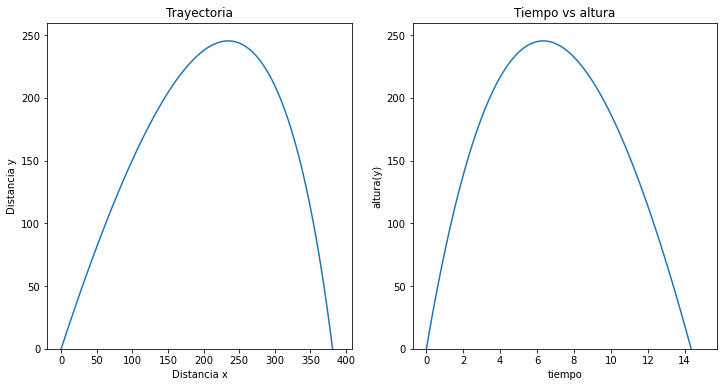

In [21]:
def y(t):
    return (C*vy+9.8*C**2)*(1-np.exp(-t/C))-9.8*C*t

def x(t):
    return C*vx*(1-np.exp(-t/C))

"""Parámetros"""
C= 10
v0=100 #m/s
alfa= np.pi/3

vx= v0*np.cos(alfa)
vy=v0*np.sin(alfa)

time=np.linspace(0,15,100) 

plt.figure(1,(12,6))
plt.clf()
plt.subplot(121)
plt.plot(x(time),y(time))
plt.xlabel("Distancia x")
plt.ylabel("Distancia y")
plt.ylim((0,260))
plt.title("Trayectoria")

plt.subplot(122)
plt.plot(time,y(time))
plt.ylim((0,260))
plt.xlabel("tiempo")
plt.ylabel("altura(y)")
plt.title("Tiempo vs altura")

- 3.2. Utilizar un método numérico (toolbox) con punto inicial $p_0=14$ y obtener una solución. . Indicar cuántos dígitos significativos tiene la solución.

In [22]:
p0= 14
solucion=optimize.fsolve(y,p0)

def significativo(f,sol_est):
    t=0
    test=-1
    while test<0:
        t+=1
        epsilon = 10**(2-t)/2
        test= f(sol_est-epsilon)*y(sol_est+epsilon)
    print(f"La cantidad de números significativos es: {t-1}")
              
t = 14 #esto es lo que hay que cambiar...
epsilon = 10**(2-t)/2
# Test del signo
y(solucion-epsilon)*y(solucion+epsilon)

print(f"La solución es: {solucion}")
significativo(y,solucion)

La solución es: [14.3529305]
La cantidad de números significativos es: 14


- 3.3 Aplicar el método de Newton y obtener una solución. Indicar cuántos dígitos significativos tiene la solución.

In [23]:
def metodo_newton(f,df,x0, tol=10**(-12)):
    fm = f(x0)
    x = x0
    k = 0
    while np.abs(fm)>tol:
        x = x - f(x)/df(x)
        fm = f(x)
        k += 1
        if k>1000:
            print('no converge')
            break
    print("Cantidad de Iteraciones:", k)
    return x

def dy(t):
    return ( ( C*vy + (49*C**2)/5)*np.exp(-t/C) / C) - 49*C/5

sol_newton = metodo_newton(y,dy,p0)
print(f"La solución con método Newton es: {sol_newton}")
significativo(y,sol_newton)

Cantidad de Iteraciones: 4
La solución con método Newton es: 14.352930500402008
La cantidad de números significativos es: 16
